**Import Libraries**

In [5]:
import numpy as np
import pandas as pd
import nltk #(natural language tool-kit)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sea
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Upload Dataset**

In [7]:
data_set=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin1')

**Top 5 rows of dataset**

In [8]:
data_set.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Random 10 rows**

In [9]:
data_set.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5154,ham,"Like &lt;#&gt; , same question",NaN,NaN,NaN
531,ham,What Today-sunday..sunday is holiday..so no wo...,NaN,NaN,NaN
650,ham,Thats cool! Sometimes slow and gentle. Sonetim...,NaN,NaN,NaN
4325,ham,That seems unnecessarily hostile,NaN,NaN,NaN
2591,ham,Still work going on:)it is very small house.,NaN,NaN,NaN
4303,ham,"Good good, billy mates all gone. Just been jog...",NaN,NaN,NaN
866,ham,"Same here, but I consider walls and bunkers an...",NaN,NaN,NaN
109,ham,Dont worry. I guess he's busy.,NaN,NaN,NaN
814,spam,U were outbid by simonwatson5120 on the Shinco...,NaN,NaN,NaN
4249,ham,How much for an eighth?,NaN,NaN,NaN


**Total rows and columns in dataset**

In [10]:
data_set.shape

(5572, 5)

In [11]:
print("Total Rows =",data_set.shape[0])
print("Total Columns =",data_set.shape[1])

Total Rows = 5572
Total Columns = 5


**Columns in datasetColumns in dataset**

In [12]:
data_set.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

**DATA CLEANING**

*Renaming cols*

In [13]:
#Renaming the columns for better understanding

data_set.rename(columns={'v1':'Variety' , 'v2':'Data'}, inplace=True)

#Renaming columns permanently so "inplace=True"
data_set.head()
     

,Variety,Data,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Dataset information**

In [14]:
#checking the use of extra columns like - Unnamed:2 , Unnamed: 3 , Unnamed: 4
print('\033[1m' + 'Information of dataset:' + '\033[0m\n\n')
data_set.info()

Information of dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Variety     5572 non-null   object
 1   Data        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Dropping extra cols**

In [15]:

#from above info we can see that last 3 columns Unnamed:2 , Unnamed: 3 , Unnamed: 4 has a good amount of 
#null values , so drop those columns 

data_set.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

#dropping columns permanently so "inplace=True"
data_set.head() #check dataset again after dropping

,Variety,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**check duplicate data in dataset**

In [16]:
print("Total Duplicated values =",data_set.duplicated().sum())


Total Duplicated values = 403


**Delete Duplicates**

In [17]:
data_set = data_set.drop_duplicates(keep='first') 
#Except keeping only first value delete every other matching to that particular value

**Check NULL values in dataset**

In [18]:
print("Total NULL values =\n\n",data_set.isnull().sum())
     

Total NULL values =

 Variety    0
Data       0
dtype: int64


**Size of dataset**

In [19]:
#The size property returns the number of elements in the DataFrame. 
#The number of elements is the number of rows * the number of columns.
print("Size of dataset is: ",data_set.size)
     

Size of dataset is:  10338


In [20]:
data_set.sample(6)


,Variety,Data
162,ham,I'm so in love with you. I'm excited each day ...
2485,ham,Lol that's different. I don't go trying to fin...
5013,ham,Hello boytoy ! Geeee ... I'm missing you today...
888,ham,You unbelievable faglord
545,ham,Then any special there?
3765,ham,Yes.mum lookin strong:)


**After Data Cleaning**

In [21]:
print("After DATA CLEANING : \n")
print("Total Rows :",data_set.shape[0],"\n Total columns :",data_set.shape[1])

After DATA CLEANING : 

Total Rows : 5169 
 Total columns : 2


**EXPLORATORY DATA ANALYSIS (EDA)**

**Count spam(1) and non-spam(0) mails**

In [22]:
data_set['Variety'].value_counts()

ham     4516
spam     653
Name: Variety, dtype: int64

In [30]:
#For tokenize the words , need to dowload the 'punkt' module
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

**Words in each text**

In [25]:

data_set['words'] = data_set['Data'].apply(lambda x:len(nltk.word_tokenize(x))) #word_tokenize is breaking according to words
data_set.sample(8)

,Variety,Data,words
4495,ham,"In case you wake up wondering where I am, I fo...",29
4304,ham,Yo come over carlos will be here soon,8
2791,ham,"Û_ we r stayin here an extra week, back next ...",34
3773,ham,Ok... But bag again..,6
2418,ham,"Madam,regret disturbance.might receive a refer...",18
983,ham,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...,13
1756,ham,Lmao ok I wont be needing u to do my hair anym...,13
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,30


**Sentences in each mail**

In [32]:
data_set['sentence'] = data_set['Data'].apply(lambda x:len(nltk.sent_tokenize(x))) #sent_tokenize is breaking according to words
data_set.sample(8)

,Variety,Data,words,sentence
5281,ham,"And how you will do that, princess? :)",11,2
391,ham,Hey so this sat are we going for the intro pil...,18,2
4380,ham,Mathews or tait or edwards or anderson,7,1
3333,ham,"That's fine, have him give me a call if he kno...",20,1
227,ham,Hey company elama po mudyadhu.,6,1
4427,ham,Aiyar dun disturb u liao... Thk u have lots 2 ...,17,1
4318,ham,Are you still playing with gautham?,7,1
2612,ham,Yes. It's all innocent fun. O:-),12,3


**Characters in each text**

In [33]:
data_set['chars']= data_set['Data'].apply(len)
data_set.sample(8)

,Variety,Data,words,sentence,chars
1732,ham,"K, can that happen tonight?",7,1,27
3513,ham,I always chat with you. In fact i need money c...,16,2,62
1620,ham,"Fuck babe, I miss you sooooo much !! I wish yo...",41,4,154
3794,ham,Also remember the beads don't come off. Ever.,11,2,45
2878,ham,U still painting ur wall?,6,1,25
2664,ham,He remains a bro amongst bros,6,1,29
1465,spam,YOU 07801543489 are guaranteed the latests Nok...,30,3,159
92,ham,Smile in Pleasure Smile in Pain Smile when tro...,28,2,141


**Statistics summary of Spam mails**

In [34]:
data_set[data_set['Variety'] == 1][['words','sentence','chars']].describe()

,words,sentence,chars
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


**Statistics summary of Non-Spam mails**

In [35]:
data_set[data_set['Variety'] == 0][['words','sentence','chars']].describe()

,words,sentence,chars
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


**HEAT MAP**

[Text(0.5, 1.0, 'Heatmap of Correlated values \n')]

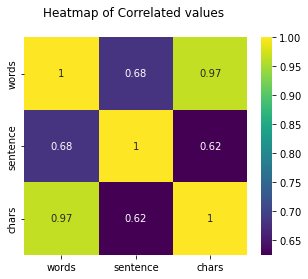

In [36]:
#A heatmap is a matrix kind of 2-dimensional figure which gives a visualisation of numerical data in the form of cells. 
#Each cell of the heatmap is coloured and the shades of colour represent some kind of relationship of the value with 
#the dataframe.

#The correlation matrix can also be generated using Seaborn library. The cells of the generated heatmap will 
#contain the correlation coefficients but the values are round off unlike heatmap generated by Pandas library.

#here "dc" is referred as Correlation in dataset (defined above)

# Defining figure size for the output plot 
fig, ax = plt.subplots(figsize = (5, 4))
#heatmap plot :  to help us spot the strongest and weaker correlations based on warmer (reds) and cooler (blues) tones
#Use annot to represent the cell values with text
sea.heatmap(data_set.corr(), annot=True, cmap="viridis").set(title='Heatmap of Correlated values \n')

**GRAPHICAL REPRESENTATION OF THE MAILS**

**FOR WORDS**

<Figure size 576x360 with 0 Axes>

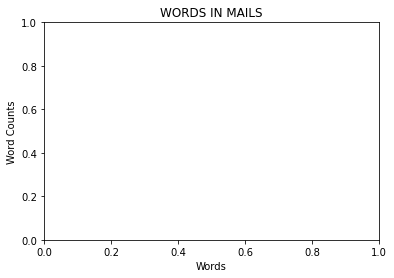

In [39]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(data_set[data_set['Variety'] == 0]['words'], color="yellow", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(data_set[data_set['Variety'] == 1]['words'], color="red", kde=True, stat="count", linewidth=0 ,ax = ax)
ax.set_ylabel("Word Counts")
ax.set_xlabel( "Words")
ax.set_title( "WORDS IN MAILS") 
plt.show()

**FOR CHARACTERS**

<Figure size 576x360 with 0 Axes>

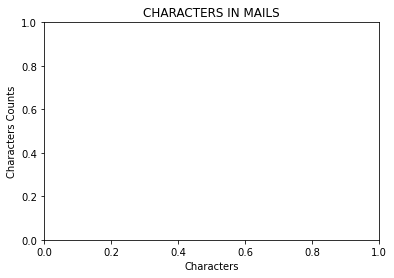

In [40]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(data_set[data_set['Variety'] == 0]['chars'], color="green", kde=True, stat="count", linewidth=0,ax = ax)
sea.histplot(data_set[data_set['Variety'] == 1]['chars'], color="red", kde=True, stat="count", linewidth=0,ax = ax)
ax.set_ylabel("Characters Counts")
ax.set_xlabel( "Characters")
ax.set_title( "CHARACTERS IN MAILS")
plt.show()
     

**FOR SENTENCES**

<Figure size 576x360 with 0 Axes>

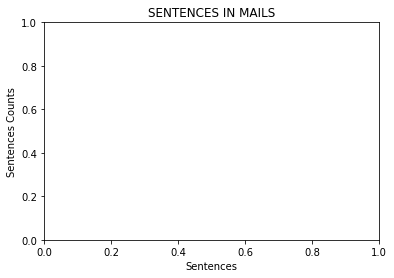

In [45]:
plt.figure(figsize=(8,5))
fig, ax = plt.subplots()
sea.histplot(data_set[data_set['Variety'] == 0]['sentence'],color="purple",kde=True,stat="count",linewidth=0,ax = ax)
sea.histplot(data_set[data_set['Variety'] == 1]['sentence'],color="red",kde=True,stat="count",linewidth=0,ax = ax)
ax.set_ylabel("Sentences Counts")
ax.set_xlabel("Sentences")
ax.set_title("SENTENCES IN MAILS")
plt.show()

**PAIRPLOT GRAPHICAL REPRESENTATION**

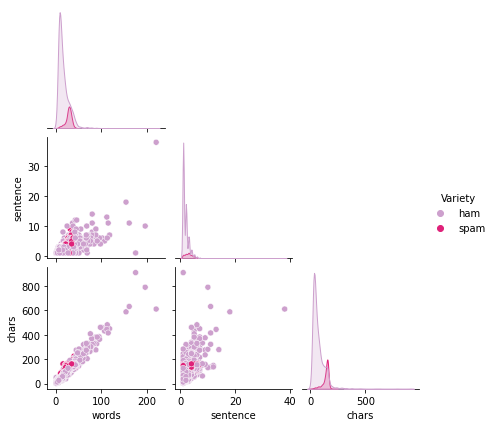

In [42]:
sea.pairplot(data_set,hue='Variety',corner=True,height=2,palette='PuRd');

**TEXT PRE-PROCESSING**

In [46]:
nltk.download('stopwords')
stopwords.words('english')[:10] 

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

**Looking for Punctuation marks**

In [47]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**Stemming method**

In [50]:
ps = PorterStemmer()
ps.stem('played')

'play'

**function for all steps of Pre-processing**

In [51]:
def changement(a):

    #LOWER CASE
    a = a.lower()

    #TOKENIZATION
    a = nltk.word_tokenize(a)
    
    #REMOVING SPECIAL CHARACTERS
    alphanum = []
    for i in a:
        if i.isalnum():
            alphanum.append(i)
    
    a = alphanum[:]
    alphanum.clear()
    
    #DELETE ALL STOPWORDS AND PUNCTUATION
    for i in a:
        if i not in stopwords.words('english') and i not in string.punctuation:
            alphanum.append(i)
            
    a = alphanum[:]
    alphanum.clear()
    
    #STEMMING
    for i in a:
        alphanum.append(ps.stem(i))
        return " ".join(alphanum)

**Pre-processing on the particular mail as examples**

In [52]:
changement("The only problem with a pencil, is that they do not stay sharp long enough?")

'problem'

**Apply Pre-processed texts to all dataset**

In [54]:
data_set['pre-processed'] = data_set['Data'].apply(changement)
data_set.tail(8)

,Variety,Data,words,sentence,chars,pre-processed
5564,ham,Why don't you wait 'til at least wednesday to ...,16,1,67,wait
5565,ham,Huh y lei...,4,1,12,huh
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,30,1,147,remind
5567,spam,This is the 2nd time we have tried 2 contact u...,35,4,161,2nd
5568,ham,Will Ì_ b going to esplanade fr home?,9,1,37,b
5569,ham,"Pity, * was in mood for that. So...any other s...",15,2,57,piti
5570,ham,The guy did some bitching but I acted like i'd...,27,1,125,guy
5571,ham,Rofl. Its true to its name,7,2,26,rofl


**Check the dimensions again**

In [56]:
data_set.shape


(5169, 6)

**data_set.shape**

**Apply Wordcloud to the NON-SPAM MAILS**

In [61]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [ ]:
non_spam = wc.generate(data_set[data_set['Variety'] == 0]['pre-processed'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(non_spam)
     

**Apply Wordcloud to the SPAM MAILS**

In [ ]:
spam = wc.generate(data_set[data_set['Variety'] == 1]['pre-processed'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam)

**MODEL BUILDING**

**Assigning variable X and Y to columns**

In [67]:
Y = data_set['Variety'].values
X = data_set['pre-processed']
     

In [68]:
X.shape

(5169,)

In [69]:
Y.shape

(5169,)

**Train-Test Split**

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=9)

In [71]:
X_train.shape

(4135,)

In [72]:
print("Total No of Rows  :",X.shape[0])
print("Rows for training :",X_train.shape[0])
print("Rows for testing  :",X_test.shape[0])
     

Total No of Rows  : 5169
Rows for training : 4135
Rows for testing  : 1034


**Feature Extraction**

In [74]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True',max_features=3000)
     

In [ ]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
     

In [ ]:
X_train_features.shape

**TRAIN THE MODEL USING LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

**Model Evaluation**

**Prediction on training data**

In [ ]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

print('Accuracy on training data : ', accuracy_on_training_data)

**Prediction on testing data**

In [ ]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

**DATASET GAVING TOTAL OF SPAM AND NON-SPAM MAILS USING PIE CHART**

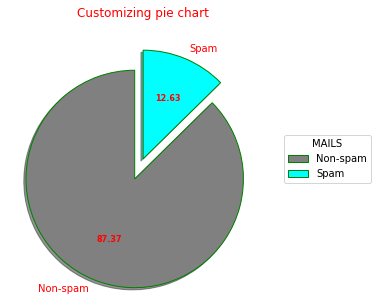

In [80]:
fig, ax = plt.subplots(figsize =(5, 5))
#labels
m=['Non-spam','Spam']
#title for chart
ax.set_title("Customizing pie chart",color="red")
# Creating color parameters
colors = ( "grey", "cyan")
# Creating explode data
explode = (0.2, 0.0)
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
# Creating plot
wedges, texts, autotexts = ax.pie(data_set['Variety'].value_counts(),
                                  autopct = "%0.2f",
                                  explode = explode,
                                  labels = m,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="red"))
# Adding legend
ax.legend(wedges,m,
          title ="MAILS",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")

plt.show()

***EMAIL SPAM DETECTOR***

**Take User Input**

In [ ]:
user_mail = input("Enter the text of the email :\n\n")

Enter the text of the email :


The Republic Day Super Sale End Soon!! Hurry and make the most out of this sale to make your “Successful Tech Career” dreams come true. 

In [ ]:
processed=changement(user_mail)
processed

**Apply Feature Extraction**

In [ ]:
input_data_features = feature_extraction.transform([processed])

#print("After Feature Extraction :\n\n",input_data_features)

**Perform Prediction Over User Input**

In [ ]:
predicted_output = model.predict(input_data_features)

#print("Predicted Output :\n\n",predicted_output)

In [ ]:
if (predicted_output[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')


Spam mail

**Showed the "spam mail" as result**